# **Understanding Digital Images with Python (cv2 + NumPy)**
These tasks are designed to help you explore how digital images are represented and manipulated using NumPy arrays. Follow each step, execute the code, and write your observations. Try to reason about why each transformation works the way it does.

# **1. Grayscale image**

**Load and View a Grayscale Image
Start by loading an image in grayscale and displaying it using matplotlib.**

In [1]:
#Libraries used to complete this task
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load image in grayscale
img_pil = Image.open(r"C:\Users\bbuser\Downloads\56368408-58561980-61c5-11e9-9800-0678dc02b4e7.png")
img_np = np.array(img_pil)
print(f"PIL Image format : {img_pil.format}, size: {img_pil.size}, mode: {img_pil.mode}")

PIL Image format : PNG, size: (768, 512), mode: L


**a. What does the array representation of the image look like?**

The array is 2D since it looks in the shape (Hight,Width)

**b.What is the shape, data type, and pixel range?**

shape : (768, 512)

data type : unit8

pixel range : 0 are close to black, 255 close to white

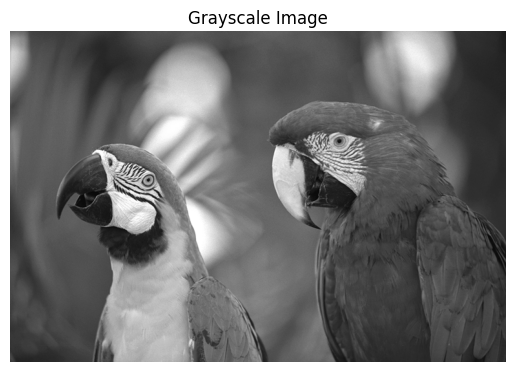

In [3]:
# Display the image
plt.imshow(img_np, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# **2. Brighten the image (50+)**

**Brighten the Image,Try adding a fixed value (e.g., +50) to all pixel values of the grayscale image**

In [4]:
bright_img = img_np + 50

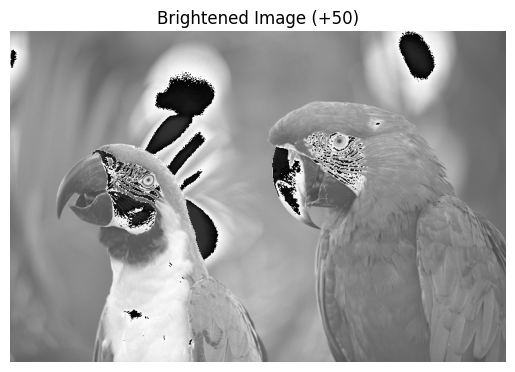

In [5]:
plt.imshow(bright_img, cmap='gray')
plt.title("Brightened Image (+50)")
plt.axis('off')
plt.show()

**a.How does the image change?**

It looks brighter

**b.What happens if a pixel value exceeds 255?**

Without np.clip(), pixel values >255 would wrap around (overflow), causing strange effects.
np.clip() ensures values stay in the valid 0–255 range for uint8.

# **3. Add a Higher Value (+300)**

**Now try adding a much higher value (e.g., +300) to the image.**

In [6]:
too_bright = img_np + 300

OverflowError: Python integer 300 out of bounds for uint8

**a.Do you get the result you expect?**

No

**b.Can you explain what’s going wrong?**

It keeps telling me that the (Python integer 300 out of bounds for unit8)

**c.Try using np.clip() to keep values between 0 and 255**

In [7]:
too_bright = img_np.astype(np.int32) + 300
too_bright = np.clip(too_bright, 0, 255).astype(np.uint8)

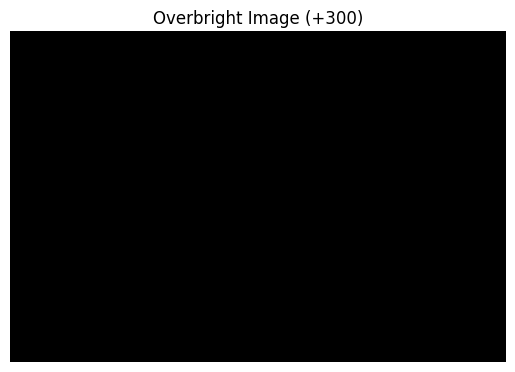

In [8]:
plt.imshow(too_bright, cmap='gray')
plt.title("Overbright Image (+300)")
plt.axis('off')
plt.show()

# **4. Subtract to Darken**

**Subtract a fixed value (e.g., -100) from the image**

In [9]:
dark_img = img_np - 100

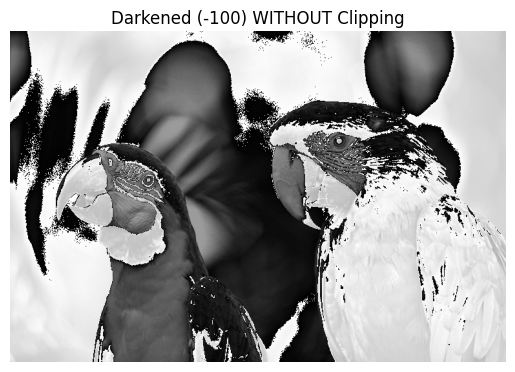

In [10]:
plt.imshow(dark_img, cmap='gray')
plt.title("Darkened (-100) WITHOUT Clipping")
plt.axis("off")
plt.show()

**a. What happens to the dark regions?**


Dark regions (low pixel values) get even darker.

Since grayscale pixel values range from 0 (black) to 255 (white), subtracting reduces brightness.

If the pixel value is already low (e.g., 40), subtracting 100 gives a negative value (-60), which can't be represented by uint8.

**b. Are any values going below 0?**

Yes, mathematically they go below 0, but practically:

NumPy arrays of type uint8 (unsigned 8-bit integer) can't represent negative numbers.

So when a subtraction results in a value < 0, it wraps around due to underflow.

In [11]:
clipped_dark = np.clip(img_np - 100, 0, 255)

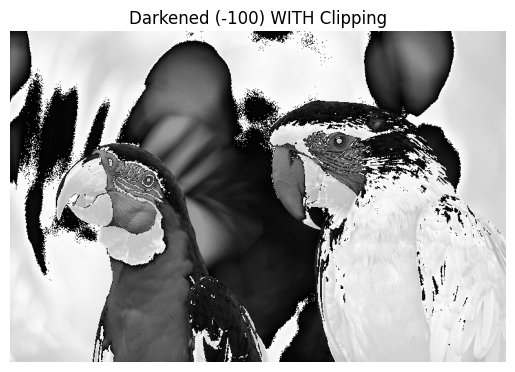

In [12]:
plt.imshow(clipped_dark, cmap='gray')
plt.title("Darkened (-100) WITH Clipping")
plt.axis("off")
plt.show()

**c. Use .clip(0, 255) to fix underflow and observe the difference.**

Clipping keeps them at black (0).

# **5. Transpose the Image**

**Transpose the image array using .T or np.transpose().**

In [13]:
transposed_img = img_np.T

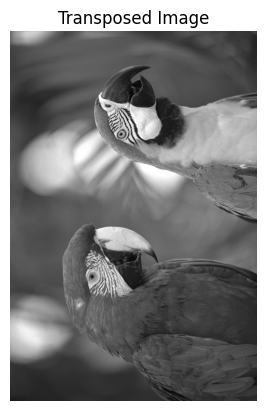

In [14]:
plt.imshow(transposed_img, cmap='gray')
plt.title("Transposed Image")
plt.axis("off")
plt.show()

**a. What happens to the orientation of the image?**

Rows become columns and vice versa [H, W] → [W, H].

**b. Does this feel like a flip, a rotation, or something else?**

Looks like a diagonal flip (mirror over main diagonal).

# **6. Flip the Image Horizontally and Vertically**

In [16]:
flip_lr = np.fliplr(img_np)

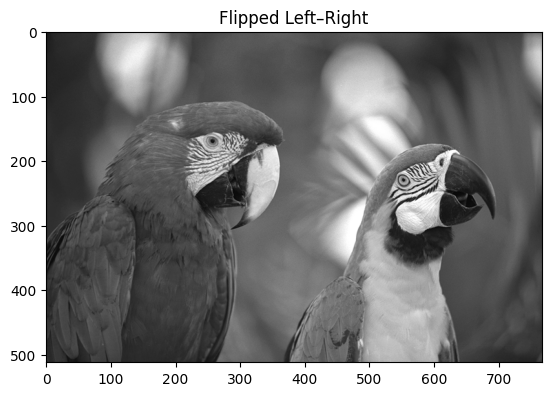

In [17]:
plt.imshow(flip_lr, cmap='gray')
plt.title("Flipped Left–Right")
plt.show()

In [18]:
flip_ud = np.flipud(img_np)

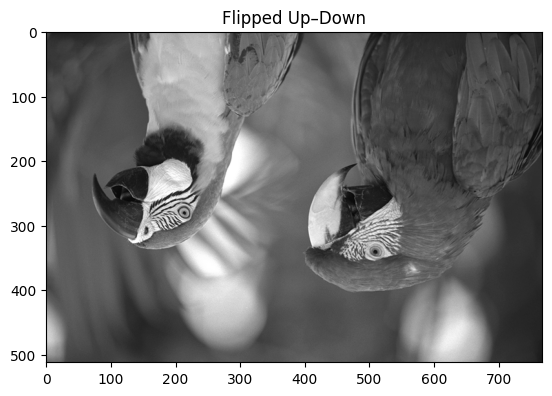

In [19]:
plt.imshow(flip_ud, cmap='gray')
plt.title("Flipped Up–Down")
plt.show()

**a. What happens to the orientation of the image?**

np.fliplr(img_np) flips the image horizontally:

The left and right sides are swapped, like a mirror placed vertically in the center.

Text or faces in the image now face the opposite direction.

np.flipud(img_np) flips the image vertically:

The top and bottom are swapped, like a mirror placed horizontally across the middle.

The image looks like it was turned upside down.

**b. Does this feel like a flip, a rotation, or something else?**

flipud() flips top-to-bottom.

# **7. Slice (Crop) a Section of the Image**

In [20]:
h, w = img_np.shape
center_crop = img_np[h//2 - 50:h//2 + 50, w//2 - 50:w//2 + 50]

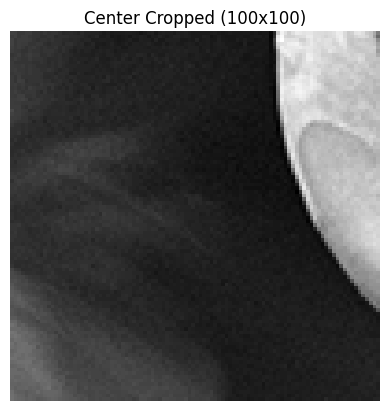

In [21]:
plt.imshow(center_crop, cmap='gray')
plt.title("Center Cropped (100x100)")
plt.axis("off")
plt.show()

**a. What part of the image are you extracting?**
The centre

Vertical range: from row h//2 - 50 to h//2 + 50

Horizontal range: from column w//2 - 50 to w//2 + 50

**b. Try slicing other regions — top-left, bottom-right, etc.**


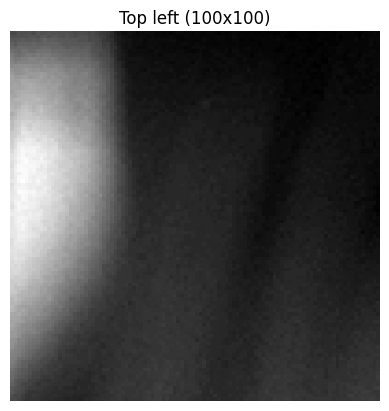

In [22]:
#Top left 100x100
top_left = img_np[0:100, 0:100]
plt.imshow(top_left, cmap='gray')
plt.title("Top left (100x100)")
plt.axis("off")
plt.show()

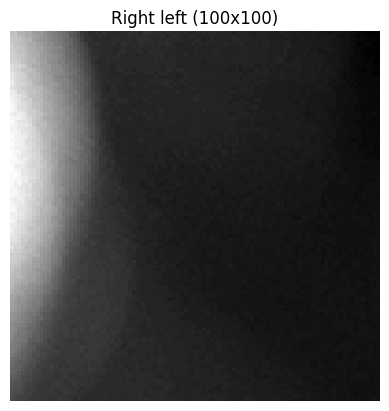

In [23]:
#Top right 100x100
top_right = img_np[0:100, w-100:w]
plt.imshow(top_right, cmap='gray')
plt.title("Right left (100x100)")
plt.axis("off")
plt.show()

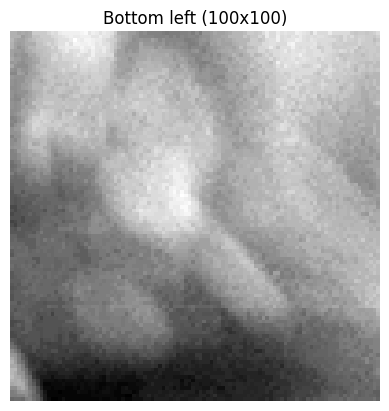

In [25]:
#Bottom left 100x100
bottom_left = img_np[h-100:h, 0:100]
plt.imshow(bottom_left, cmap='gray')
plt.title("Bottom left (100x100)")
plt.axis("off")
plt.show()

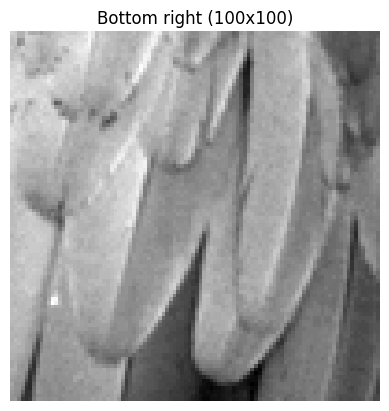

In [26]:
#Bottom right 100x100
bottom_right = img_np[h-100:h, w-100:w]
plt.imshow(bottom_right, cmap='gray')
plt.title("Bottom right (100x100)")
plt.axis("off")
plt.show()

# **8. Create a Negative Image**

**Use 255 - img to invert pixel values and create a negative effect.**

In [27]:
negative_img = 255 - img_np

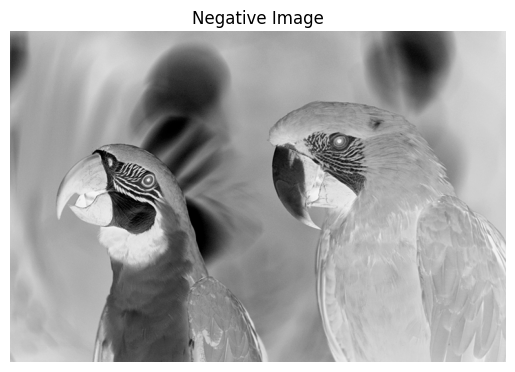

In [28]:
plt.imshow(negative_img, cmap='gray')
plt.title("Negative Image")
plt.axis("off")
plt.show()

**a.What do brighter and darker areas become?**

Brighter areas (values close to 255, like white or light gray) become darker (close to 0).

Darker areas (values close to 0, like black) become brighter (close to 255)

**b.What kind of images could this be useful for?**

Creating negative images is not just for artistic effects — it's used in several real-world applications:

Medical imaging

OCR and preprocessing

Computer vision tasks

Art/design filters

Forensic image analysis

# **9. Rotate the Image**

**Rotate the image 90 degrees using np.rot90(img, k=...).**


**a.Try different values of k (1, -1, 2, etc.).**

In [32]:
rotated_90 = np.rot90(img_np, k=1)

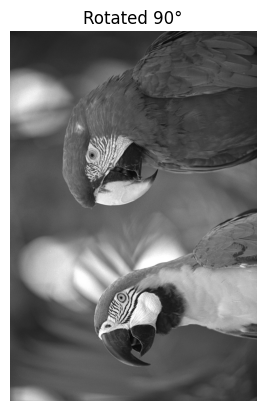

In [33]:
plt.imshow(rotated_90, cmap='gray')
plt.title("Rotated 90°")
plt.axis("off")
plt.show()

In [34]:
rotated_180 = np.rot90(img_np, k=2)

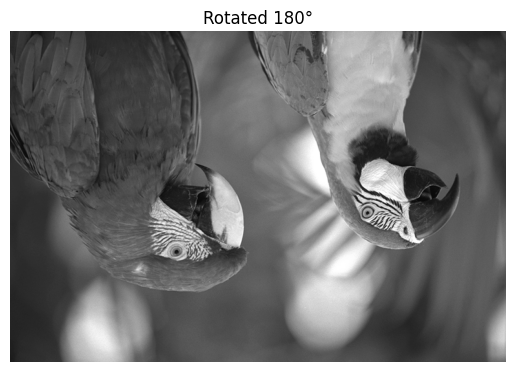

In [35]:
plt.imshow(rotated_180, cmap='gray')
plt.title("Rotated 180°")
plt.axis("off")
plt.show()

In [36]:
rotated_neg90 = np.rot90(img_np, k=-1)

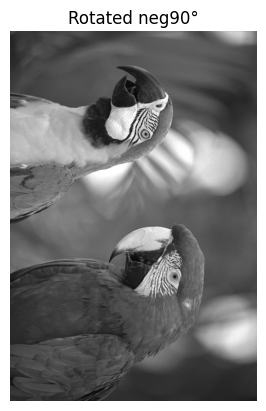

In [38]:
plt.imshow(rotated_neg90, cmap='gray')
plt.title("Rotated neg90°")
plt.axis("off")
plt.show()

**b. How does this differ from transpose and flip?**

Unlike transpose or flip, this rotates the image.

k=1: 90° counter-clockwise.

k=-1: 90° clockwise.

# **10. Combine Multiple Transformations**

**Try this sequence:**

**a. Crop the center of the image.**

**b. Flip the cropped section horizontally.**

**c. Brighten the result.**

**d. Display the final transformation.**

In [39]:
# Crop
crop = img_np[h//2 - 50:h//2 + 50, w//2 - 50:w//2 + 50]
# Flip
flip_crop = np.fliplr(crop)
# Brighten
final = np.clip(flip_crop + 100, 0, 255)

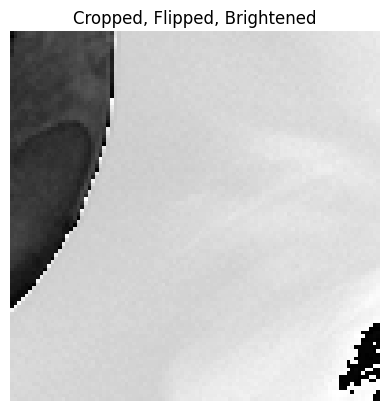

In [40]:
plt.imshow(final, cmap='gray')
plt.title("Cropped, Flipped, Brightened")
plt.axis("off")
plt.show()

**e. How does each transformation affect the image?**

Cropping reduces the image to a smaller region.

Flipping mirrors the image horizontally or vertically.

Brightening increases pixel intensity, making the image lighter.

**f. Does the order of operations matter? Why?**

Yes, it matters — because each operation builds on the result of the previous one.
Changing the order can lead to different visual outcomes.